In [1]:
from parse import parse_image
from normalize_heights import normalize_heights
from process_training_data import process_training_data
from train import train
from generate import generate_map
from libraries.images import show_image
from libraries.matrix_manipulation import rescale
import cv2

# WARNING
# Parsing and training computations are demanding. Especially computations connected to buildings due to big ammount of data.

In [ ]:
# PARSE HEIGHTS
height_image = "raw_data/cz/heights.pgm" # Provide the name of your image
parse_image(height_image, "training_data/height_layers")
# These scripts automatically work with "training_data/heigh_layers"
normalize_heights()
process_training_data("height", 16, 64, None)
process_training_data("height", 4, 16, 64)
process_training_data("height", 1, 4, 16)

In [ ]:
# TRAIN HIGHTS
# Make sure the directory, where you store models, is present ("models/")
train("model_structures/heights_single.txt", "training_data/heights_64-16_150000", "models/heights_64-16")
train("model_structures/heights.txt", "training_data/heights_64-16-4_150000", "models/heights_64-16-4")
train("model_structures/heights.txt", "training_data/heights_16-4-1_150000", "models/heights_16-4-1")

In [ ]:
# PARSE FEATURES
data_folder = "raw_data/cz" # Provide your images data folder
parse_image(f"{raw_data}/heights.pgm", "training_data/height_layers", compute_differences=True)
for mode in ["road", "river", "building"]:
    parse_image(f"{data_folder}/{mode}s.pgm", f"training_data/{mode}_layers")
    parse_image(f"{data_folder}/{mode}s.pgm", f"training_data/{mode}_layers", iterations=1, blur=True)
    # These scripts automatically work with "training_data/{mode}_layers"
    process_training_data(mode, 16, 64, None)
    process_training_data(mode, 4, 16, 64)
    process_training_data(mode, 1, 16, 64)
    

In [ ]:
# TRAIN FEATURES
# Make sure the directory, where you store models, is present ("models/")
for mode in ["roads", "rivers", "buildings"]:
    train(f"model_structures/{mode}2.txt", f"training_data/{mode}_64-16_150000", f"models/{mode}_64-16")
    train(f"model_structures/{mode}1.txt", f"training_data/{mode}_64-16-4_150000", f"models/{mode}_64-16-4")
    train(f"model_structures/{mode}0_blurry.txt", f"training_data/{mode}_16-4-1_150000/blurry", f"models/{mode}_16-4-blurry")
    train(f"model_structures/{mode}0_focus.txt", f"training_data/{mode}_16-4-1_150000/focus", f"models/{mode}_blurry-focus")

In [ ]:
# GENERATE
#=======================
# This is configuration file specifying networks used for generation.
# Edit, if you have different networks.
with open("generation_config.txt") as config:
    print(config.read())

generate_map("generation_data/complex", "generated/complex")

heights_64-16=models/sahara_heights_64-16_9.h5
heights_64-16-4=models/sahara_heights_64-16-4_9.h5
heights_16-4-1=models/sahara_heights_16-4-1_9.h5
roads_64-16=models/roads_64-16_9.h5
roads_64-16-4=models/roads_64-16-4_9.h5
roads_16-4-1=models/roads_16-4-blurry_9.h5
roads_focus=models/roads_blurry-focus_9.h5
rivers_64-16=models/rivers_64-16_4.h5
rivers_64-16-4=models/rivers_64-16-4_4.h5
rivers_16-4-1=models/rivers_16-4-blurry_4.h5
rivers_focus=models/rivers_blurry-focus_4.h5
buildings_64-16=models/buildings_64-16_4.h5
buildings_64-16-4=models/buildings_64-16-4_4.h5
buildings_16-4-1=models/buildings_16-4-blurry_2.h5
buildings_focus=models/buildings_blurry-focus_2.h5


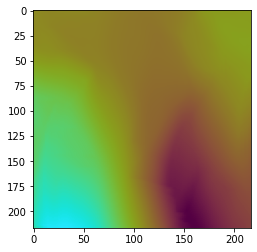

In [39]:
image = cv2.imread("generated/complex/generated_heights_1x.png")
show_image(rescale(image))

In [ ]:
train("model_structures/buildings1.txt", "training_data/buildings_64-16-4_150000", "models/buildings_64-16-4")